## DSP5100 Health Data Analytics


Import library

In [2]:
!pip install scikeras
!pip install keras-tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from scikeras.wrappers import KerasClassifier
import keras
from keras_tuner import RandomSearch
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


# Load the Dataset

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(path)

# 1.Explore the Data:

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# 2. Data Preprocessing:

In [8]:
# Check for any missing values and data types.
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [9]:
# Map from the string values to integers.
# One-hot encode categorical features.
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False


In [10]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'NObeyesdad' column
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,True,...,False,False,False,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,True,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,False,...,False,False,True,False,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,5,False,...,False,False,True,False,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,6,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,4,True,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,4,True,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,4,True,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,4,True,...,False,False,False,True,False,False,False,False,True,False


In [11]:
# Check outlier with visualization method.
# Select specific numerical columns
selected_columns = ['Age', 'Height', 'Weight', 'FCVC','NCP','CH2O','FAF','TUE']

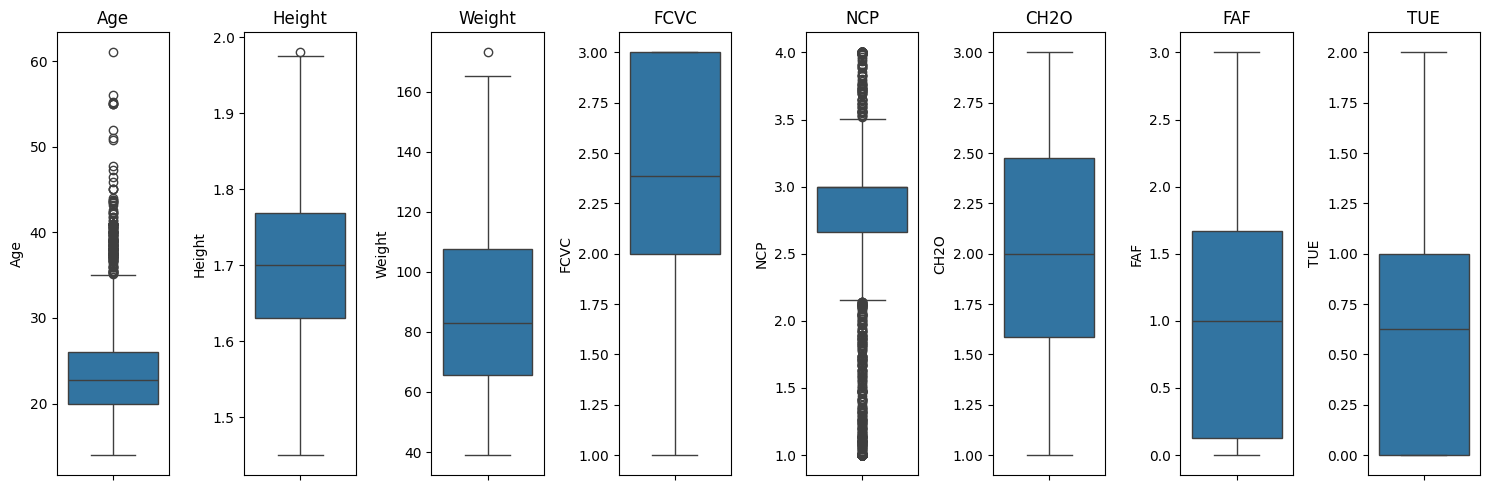

In [12]:
# Plotting boxplots for the selected numerical columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


# Data Normalization:

* Normalize the data for handeling the outlier to improve the visualization.

In [13]:
# Selecting the columns to be normalized
columns_to_normalize = ['Age', 'Height', 'Weight', 'FCVC','NCP','CH2O','FAF','TUE']

# Creating a copy of the data for normalization purposes
df_normalized = df.copy()

In [14]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = min_max_scaler.fit_transform(df_normalized[columns_to_normalize])
# Display the first few rows of the normalized data for Min-Max Normalization
df_normalized.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1,True,...,False,False,False,False,True,False,False,False,True,False
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1,True,...,True,False,False,True,False,False,False,False,True,False
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,1,False,...,False,False,True,False,False,False,False,False,True,False
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,5,False,...,False,False,True,False,False,False,False,False,False,True
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,6,False,...,False,False,False,True,False,False,False,False,True,False


In [15]:
# Selecting specific numerical columns
selected_columns = ['Age', 'Height', 'Weight', 'FCVC','NCP','CH2O','FAF','TUE']

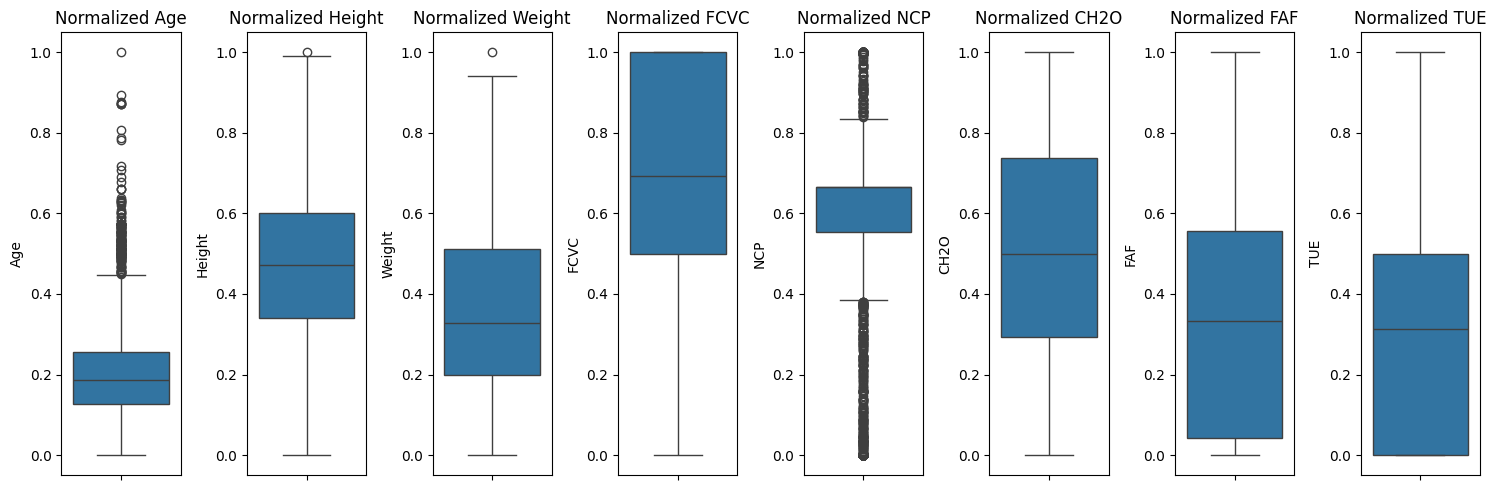

In [16]:
# Plotting boxplots for the normalized data
plt.figure(figsize=(15, 5))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.boxplot(y=df_normalized[column])
    plt.title(f'Normalized {column}')


plt.tight_layout()
plt.show()

# 3. Exploratory Data Analysis (EDA):

<Axes: xlabel='NObeyesdad', ylabel='count'>

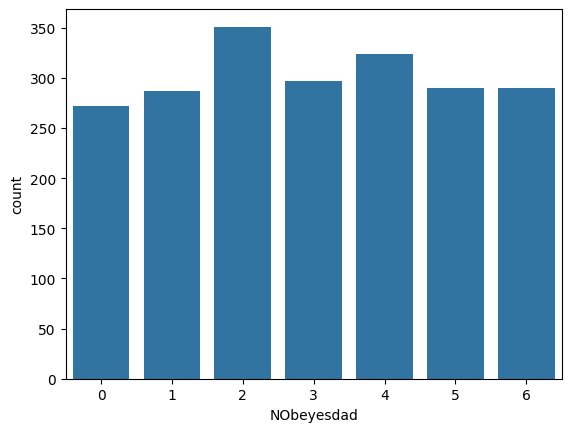

In [17]:
#visualize the distribution of the 'NObeyesdad' variable
sns.countplot(x = 'NObeyesdad',data = df_normalized)

In [18]:
#Explore relationships between variables
#sns.pairplot(data=df_normalized, hue='NObeyesdad')

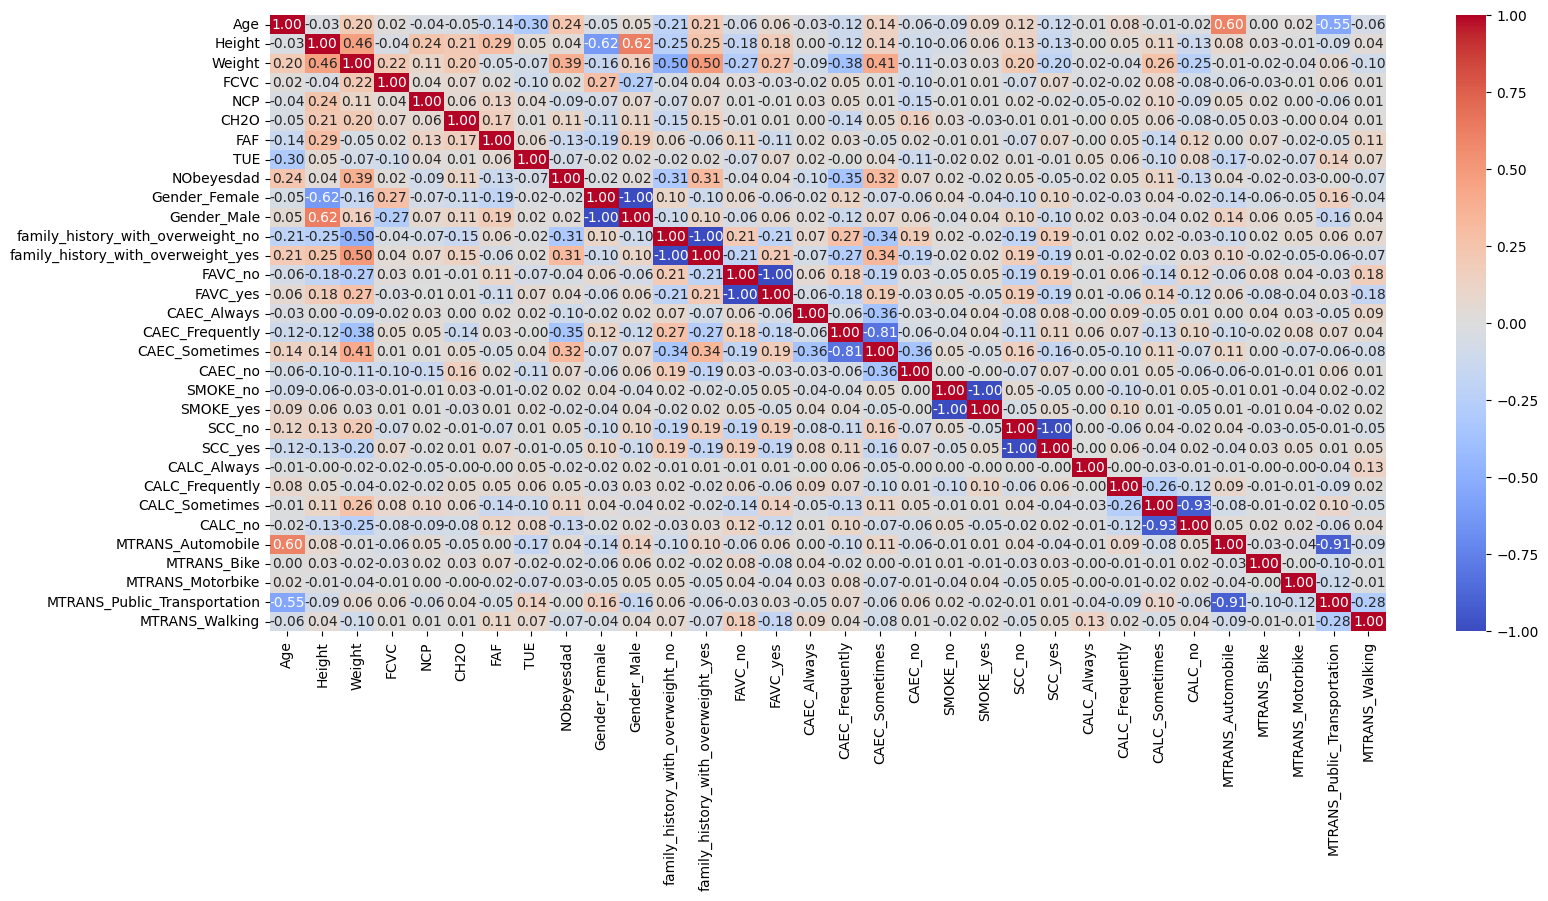

In [19]:
# Visualize correlations between variables

correlation_matrix = df_normalized.corr()
correlation_matrix
plt.figure(figsize=(18, 8))
sns.heatmap(df_normalized.corr(), cmap="coolwarm", annot = True, fmt='.2f')
plt.show()

In [20]:
# Extract features and target variable
X = df.drop (columns=['NObeyesdad'])
y = df['NObeyesdad']

# Split the Data:

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Development:

# Build and Train the Models:

### Train Logistic Regression Model


In [22]:
# Define the pipeline with a LogisticRegression classifier
preprocessor = StandardScaler()
logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],       # L1 and L2 regularization
    'classifier__solver': ['liblinear']        # Solver for small datasets
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and results
best_logistic_model = grid_search.best_estimator_
best_params_lr = grid_search.best_params_

# Evaluate the best model using the test set
logistic_pred = best_logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, logistic_pred)
classification_rep_lr = classification_report(y_test, logistic_pred, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_lr = classification_rep_lr['weighted avg']
precision_lr = weighted_avg_lr['precision']
recall_lr = weighted_avg_lr['recall']
f1_score_lr = weighted_avg_lr['f1-score']

# Displaying the best parameters and evaluation results
best_params_lr, accuracy_lr, precision_lr, recall_lr, f1_score_lr

# Importing the necessary metrics again (accuracy_score and classification_report)
from sklearn.metrics import accuracy_score, classification_report

# Re-running the evaluation after importing the required functions
accuracy_lr = accuracy_score(y_test, logistic_pred)
classification_rep_lr = classification_report(y_test, logistic_pred, output_dict=True)

# Extracting the weighted average part for precision, recall, and f1-score
weighted_avg_lr = classification_rep_lr['weighted avg']
precision_lr = weighted_avg_lr['precision']
recall_lr = weighted_avg_lr['recall']
f1_score_lr = weighted_avg_lr['f1-score']

# Display the results
print(f"Best Parameters: {best_params_lr}")
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Overall Precision: {precision_lr:.4f}')
print(f'Overall Recall: {recall_lr:.4f}')
print(f'Overall F1-Score: {f1_score_lr:.4f}')

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Accuracy: 0.7754
Overall Precision: 0.7846
Overall Recall: 0.7754
Overall F1-Score: 0.7737


### Train Decision Tree Model


In [23]:
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model in a pipeline (with preprocessing)
# Create a preprocessor object - here we use a StandardScaler
preprocessor = StandardScaler()
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

# Set up GridSearchCV
grid_search_dt = GridSearchCV(decision_tree_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit Grid Search to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best model and its parameters
best_decision_tree_model = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

# Predict using the best Decision Tree model
decision_tree_pred = best_decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, decision_tree_pred)
classification_rep_dt = classification_report(y_test, decision_tree_pred, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_dt = classification_rep_dt['weighted avg']
precision_dt = weighted_avg_dt['precision']
recall_dt = weighted_avg_dt['recall']
f1_score_dt = weighted_avg_dt['f1-score']

# Display the best parameters and evaluation results
print(f"Best Parameters: {best_params_dt}")
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Overall Precision: {precision_dt:.4f}')
print(f'Overall Recall: {recall_dt:.4f}')
print(f'Overall F1-Score: {f1_score_dt:.4f}')


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.9598
Overall Precision: 0.9604
Overall Recall: 0.9598
Overall F1-Score: 0.9598


### Train Random Forest Model


In [24]:
# Define the parameter grid for Grid Search
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'classifier__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf
    'classifier__criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}


# Initialize the Random Forest model in a pipeline (with preprocessing)
preprocessor = StandardScaler()
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(random_forest_pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Fit Grid Search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_random_forest_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict using the best Random Forest model
random_forest_pred = best_random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, random_forest_pred)
classification_rep_rf = classification_report(y_test, random_forest_pred, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_rf = classification_rep_rf['weighted avg']
precision_rf = weighted_avg_rf['precision']
recall_rf = weighted_avg_rf['recall']
f1_score_rf = weighted_avg_rf['f1-score']

# Display the best parameters and evaluation results
print(f"Best Parameters: {best_params_rf}")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Overall Precision: {precision_rf:.4f}')
print(f'Overall Recall: {recall_rf:.4f}')
print(f'Overall F1-Score: {f1_score_rf:.4f}')


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Accuracy: 0.9456
Overall Precision: 0.9476
Overall Recall: 0.9456
Overall F1-Score: 0.9461


### Train K-Nearest Neighbors Model


In [25]:
# Define the parameter grid for Grid Search
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 10, 15, 20],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # How to weight the votes
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize the K-NN model in a pipeline (with preprocessing)
preprocessor = StandardScaler()
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])

# Set up GridSearchCV for K-NN
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy')

# Fit Grid Search to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best model and its parameters
best_knn_model = grid_search_knn.best_estimator_
best_params_knn = grid_search_knn.best_params_

# Predict using the best K-NN model
knn_pred = best_knn_model.predict(X_test)

# Evaluate the model
accuracy_KNN = accuracy_score(y_test, knn_pred)
classification_rep_KNN = classification_report(y_test, knn_pred, output_dict=True)

# Extract the weighted average part for precision, recall, and f1-score
weighted_avg_KNN = classification_rep_KNN['weighted avg']
precision_KNN = weighted_avg_KNN['precision']
recall_KNN = weighted_avg_KNN['recall']
f1_score_KNN = weighted_avg_KNN['f1-score']

# Display the best parameters and evaluation results
print(f"Best Parameters: {best_params_knn}")
print(f'Accuracy: {accuracy_KNN:.4f}')
print(f'Overall Precision: {precision_KNN:.4f}')
print(f'Overall Recall: {recall_KNN:.4f}')
print(f'Overall F1-Score: {f1_score_KNN:.4f}')

Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Accuracy: 0.8511
Overall Precision: 0.8479
Overall Recall: 0.8511
Overall F1-Score: 0.8479


In [26]:
X_train1, X_test1 = train_test_split(df_normalized, test_size=0.2, random_state=42, shuffle= True)
Y_train1, Y_test1 = train_test_split(df_normalized['NObeyesdad'], test_size=0.2, random_state=42, shuffle= True)
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(
    X_train1, Y_train1, test_size=0.1, random_state=42, shuffle=False)

In [27]:
X_train1 = X_train1.values.reshape(X_train1.values.shape[0], X_train1.values.shape[1], 1)
X_test1 = X_test1.values.reshape(X_test1.values.shape[0], X_test1.values.shape[1], 1)
X_val1 = X_val1.values.reshape(X_val1.values.shape[0], X_val1.values.shape[1], 1)
Y_train1 = Y_train1.values.reshape(Y_train1.values.shape[0], 1)
Y_test1 = Y_test1.values.reshape(Y_test1.values.shape[0], 1)
Y_val1 = Y_val1.values.reshape(Y_val1.values.shape[0], 1)


# Train Artificial Neural Networks (ANN) Model

In [28]:
# Function to create the ANN model with hyperparameters for tuning
def build_ann_model(hp):
    model = Sequential()

    # Input layer: Number of neurons in the first layer
    model.add(Dense(units=hp.Int('units_input', min_value=8, max_value=64, step=8),
                    activation='relu', input_shape=(X_train.shape[1],)))

    # Hidden layer: Number of neurons in the hidden layer
    model.add(Dense(units=hp.Int('units_hidden', min_value=8, max_value=64, step=8),
                    activation='relu'))

    # Output layer: Since this is a multiclass classification problem, we use 'softmax' for output
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    # Compile the model: Tune the learning rate as part of the optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Initialize the Keras Tuner's RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    build_ann_model,
    objective='val_accuracy',
    max_trials=5,  # Number of models to test
    executions_per_trial=3,  # Run each model 3 times for robust evaluation
    directory='ann_tuning',  # Directory to save the tuning results
    project_name='obesity_classification'
)

# Early stopping callback: Stops training if no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Perform the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Get the optimal hyperparameters and the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict on the test set
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy_ANN = accuracy_score(y_test, y_pred)
precision_ANN = precision_score(y_test, y_pred, average='weighted')
recall_ANN = recall_score(y_test, y_pred, average='weighted')
f1_score_ANN = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f'Accuracy: {accuracy_ANN:.4f}')
print(f'Overall Precision: {precision_ANN:.4f}')
print(f'Overall Recall: {recall_ANN:.4f}')
print(f'Overall F1-Score: {f1_score_ANN:.4f}')


Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.5700197219848633

Best val_accuracy So Far: 0.6469427943229675
Total elapsed time: 00h 01m 09s
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1567 - loss: 6.0512 - val_accuracy: 0.1657 - val_loss: 1.9456
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2304 - loss: 1.8033 - val_accuracy: 0.2751 - val_loss: 1.6123
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2530 - loss: 1.6711 - val_accuracy: 0.3018 - val_loss: 1.5489
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3157 - loss: 1.5653 - val_accuracy: 0.3491 - val_loss: 1.5428
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3653 - loss: 1.5216 - val_accuracy: 0.4053 - val_loss: 1.3896
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4366 - loss: 1.3909 - val_accuracy: 0.4556 - val_loss: 1.3047
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 1.3203 - val_accuracy: 0.5414 - val_loss: 1.2319
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 1.2261 - val_accuracy: 0.5266 - val_loss: 1.1414
Epo

In [29]:
# Print the accuracies of all models
#print(f'Logistic Regression Accuracy: {logistic_accuracy}')
#print(f'Decision Tree Accuracy: {decision_tree_accuracy}')
#print(f'Random Forest Accuracy: {random_forest_accuracy}')
#print(f'K-NN Accuracy: {knn_accuracy}')
#print(f'ANN Accuracy: {ANN_accuracy}')

#print(f'Logistic Regression Precision: {precision_lr:.4f}')
#print(f'Decision Tree Precision: {precision_dt:.4f}')
#print(f'Random Forest Precision: {precision_rf:.4f}')
#print(f'K-NN Precision: {precision_KNN:.4f}')
#print(f'ANN Precision: {ANN_precision:.4f}')


#print(f'Logistic Regression Recall: {recall_lr:.4f}')
#print(f'Decision Tree Recall: {recall_dt:.4f}')
#print(f'Random Forest Recall: {recall_rf:.4f}')
#print(f'K-NN Recall: {recall_KNN:.4f}')
#print(f'ANN Recall: {ANN_recall:.4f}')


#print(f'Logistic Regression F1-Score: {f1_score_lr:.4f}')
#print(f'Decision Tree F1-Score: {f1_score_dt:.4f}')
#print(f'Random Forest F1-Score: {f1_score_rf:.4f}')
#print(f'K-NN F1-Score: {f1_score_KNN:.4f}')
#print(f'ANN F1-Score: {f1_score_ANN:.4f}')


# Print the results
#print(f'Test Accuracy: {accuracy:.4f}')
#print(f'Test Precision (Weighted): {precision:.4f}')
#print(f'Test Recall (Weighted): {recall:.4f}')
#print(f'Test F1-Score (Weighted): {f1:.4f}')
#print(f'Test F1-Score (Weighted): {f1:.4f}')


# 6. Model Evaluation:

In [30]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'ANN'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_KNN, accuracy_ANN ],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_KNN, precision_ANN ],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_KNN, recall_ANN],
    'F1-Score': [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_KNN, f1_score_ANN]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the table for comparison
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.775414   0.784579  0.775414  0.773719
1        Decision Tree  0.959811   0.960384  0.959811  0.959828
2        Random Forest  0.945626   0.947616  0.945626  0.946076
3                 K-NN  0.851064   0.847902  0.851064  0.847935
4                  ANN  0.583924   0.621803  0.583924  0.575845


# Comparison between Models with ROC_AUC


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.775414   0.784579  0.775414  0.773719  0.941048
1        Decision Tree  0.959811   0.960384  0.959811  0.959828  0.976057
2        Random Forest  0.945626   0.947616  0.945626  0.946076  0.995589
3                 K-NN  0.851064   0.847902  0.851064  0.847935  0.960452
4                  ANN  0.583924   0.621803  0.583924  0.575845  0.918569


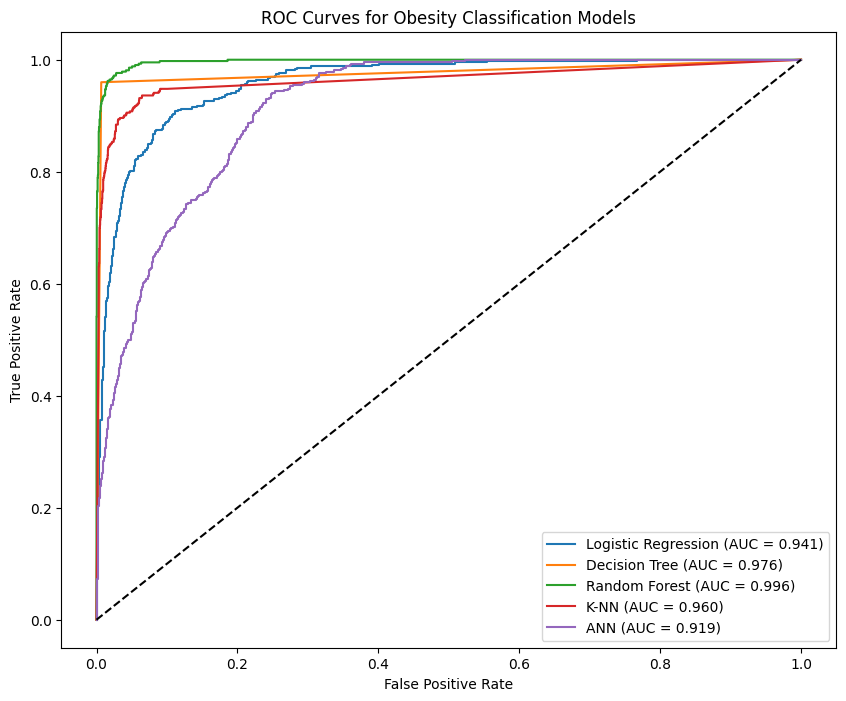

In [31]:
# Binarize the target variable for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probabilities for each model
y_pred_prob_lr = best_logistic_model.predict_proba(X_test)
y_pred_prob_dt = best_decision_tree_model.predict_proba(X_test)
y_pred_prob_rf = best_random_forest_model.predict_proba(X_test)
y_pred_prob_knn = best_knn_model.predict_proba(X_test)
y_pred_prob_ann = best_model.predict(X_test)

# Calculate ROC-AUC for each model
roc_auc_lr = roc_auc_score(y_test_bin, y_pred_prob_lr)
roc_auc_dt = roc_auc_score(y_test_bin, y_pred_prob_dt)
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_prob_rf)
roc_auc_knn = roc_auc_score(y_test_bin, y_pred_prob_knn)
roc_auc_ann = roc_auc_score(y_test_bin, y_pred_prob_ann)

# Add ROC-AUC to the results DataFrame
results_df['ROC-AUC'] = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_knn, roc_auc_ann]

# Display the updated table
print(results_df)

# Plotting ROC curves for each model (optional)
plt.figure(figsize=(10, 8))
n_classes = len(np.unique(y_test))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_lr.ravel())
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_dt.ravel())
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_rf.ravel())
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# K-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_knn.ravel())
plt.plot(fpr_knn, tpr_knn, label=f'K-NN (AUC = {roc_auc_knn:.3f})')

# ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_ann.ravel())
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {roc_auc_ann:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Obesity Classification Models')
plt.legend(loc='lower right')
plt.show()


# Feature Selection

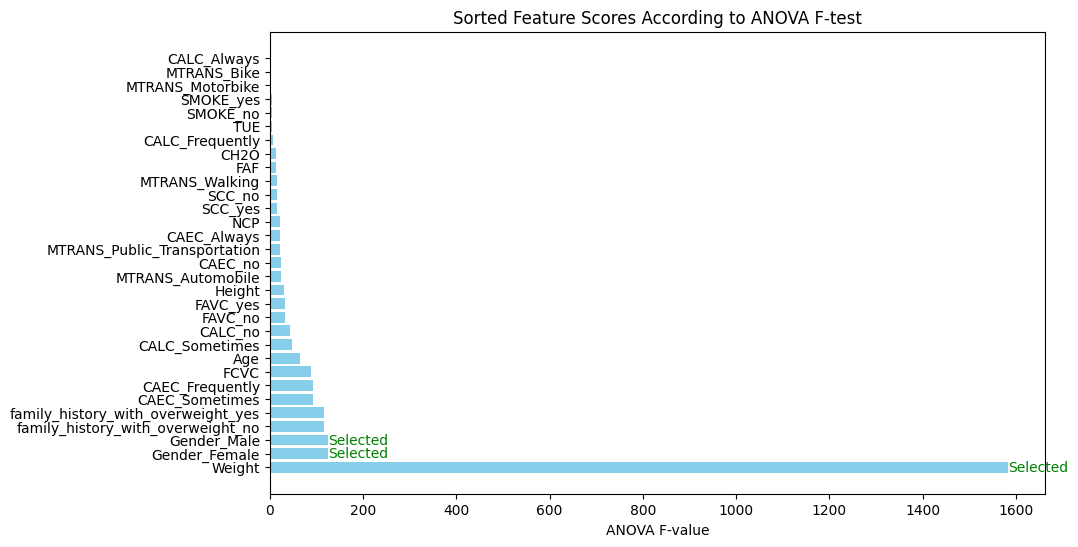

In [32]:
# Step 1: Select the feature according to ANOVA F-test
# Fit the SelectKBest model
selector = SelectKBest(f_classif, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the feature scores and feature names
feature_scores = selector.scores_
feature_names = X_train.columns

# Sort the features by their scores in descending order
sorted_indices = np.argsort(feature_scores)[::-1]

sorted_scores = feature_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot for sorted feature scores
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_feature_names)), sorted_scores, color='skyblue')
plt.yticks(np.arange(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('ANOVA F-value')
plt.title('Sorted Feature Scores According to ANOVA F-test')

# Highlight the selected features
selected_mask = selector.get_support()[sorted_indices]
for idx, is_selected in enumerate(selected_mask):
    if is_selected:
        plt.text(sorted_scores[idx], idx, 'Selected', va='center', color='green')

plt.show()


In [33]:
# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')

# Step 2: K-Fold Cross-Validation Setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Define the Classical ML Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Step 4: Train and Evaluate Each Classical Model Using the Selected Features
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train_selected, y_train, cv=kfold, scoring='accuracy')

    # Print the model's average accuracy
    print(f'{name} Cross-validated Accuracy: {scores.mean():.4f}')

# Step 5: Define and Train the ANN Model Using the Selected Features
def create_ann_model():
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(16, activation='relu', input_shape=(X_train_selected.shape[1],)))

    # Second hidden layer
    model.add(Dense(8, activation='relu'))

    # Output layer with softmax activation (for multiclass classification)
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 6: Use KerasClassifier for ANN Cross-Validation
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=10, batch_size=32, verbose=0)

# Perform cross-validation for ANN
ann_scores = cross_val_score(ann_model, X_train_selected, y_train, cv=kfold, scoring='accuracy')

# Print the ANN model's average accuracy
print(f'ANN Cross-validated Accuracy: {ann_scores.mean():.4f}')


Selected Features: Index(['Weight', 'Gender_Female', 'Gender_Male'], dtype='object')
Logistic Regression Cross-validated Accuracy: 0.6949
Random Forest Cross-validated Accuracy: 0.7168
K-NN Cross-validated Accuracy: 0.7198
Decision Tree Cross-validated Accuracy: 0.7103


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

ANN Cross-validated Accuracy: 0.2903


In [34]:
model_names = ['Logistic Regression', 'Random Forest', 'K-NN', 'Decision Tree', 'ANN']
accuracy_scores = [0.6949, 0.7168, 0.7198, 0.7103, 0.1866]

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Cross-Validated Accuracy': accuracy_scores
})

results_df


,Model,Cross-Validated Accuracy
0,Logistic Regression,0.6949
1,Random Forest,0.7168
2,K-NN,0.7198
3,Decision Tree,0.7103
4,ANN,0.1866
